In [2]:
include("../../Purification/driver.jl")

perform_purification (generic function with 1 method)

In [3]:
using LinearAlgebra
using Printf
using CairoMakie
using Statistics
using SparseArrays

In [49]:
function h0_sparseGraphene(L::Int64,Λ::Float64)::SparseMatrixCSC{Complex{Float64},Int64}
    rows = Int64[]
    cols = Int64[]
    vals = Complex{Float64}[]
    
    for i1 in 1:L
        for i2 in 1:L
            i = (i2-1)*L + i1
            push!(rows, i)
            push!(cols, i + L*L)
            push!(vals, -1.)

            push!(rows, i+L*L)
            push!(cols, i)
            push!(vals,-1.)

            push!(rows, i)
            push!(cols, (i2-1)*L + (mod1(i1-1, L)) +L*L)
            push!(vals, -1.)

            push!(rows, (i2-1)*L + (mod1(i1-1, L)) + L*L)
            push!(cols, i)
            push!(vals, -1.)

            push!(rows, i)
            push!(cols, (mod1(i2-1, L)-1)*L + i1 +L*L)
            push!(vals, -1.)

            push!(rows, (mod1(i2-1, L)-1)*L + i1 +L*L)
            push!(cols, i)
            push!(vals,-1.)

            push!(rows, i)
            push!(cols, i) 
            push!(vals, 0.5)

          push!(rows, i + L*L)
          push!(cols, i + L*L)
          push!(vals, -0.5) #hBN Term


        
    end
end
    
    return sparse(rows, cols, vals / Λ, 2*L^2, 2*L^2)
end


function h0_sparse_chain(L::Int)::SparseMatrixCSC{Complex{Float64},Int64}
    rows = Int64[]
    cols = Int64[]
    vals = Complex{Float64}[]
    
    for i in 1:L
        push!(rows, i)
        push!(cols, mod1(i+1,L))
        push!(vals, -1.)
     

        push!(rows, mod1(i+1,L))
        push!(cols, i)
        push!(vals,-1.)
    end
    
    return sparse(rows, cols, vals, L, L)
end

function h0_sparse_chain(L::Int)::SparseMatrixCSC{Complex{Float64},Int64}
    rows = Int64[]
    cols = Int64[]
    vals = Complex{Float64}[]
    β = (sqrt(5)-1)/2
    for i in 1:L
        push!(rows, i)
        push!(cols, mod1(i+1,L))
        push!(vals, -1. - 2.0 * cos(2pi*β * (i-1)))
     

        push!(rows, mod1(i+1,L))
        push!(cols, i)
        push!(vals, -1. - 2.0 * cos(2pi*β * (i-1)))
    end
    
    return sparse(rows, cols, vals, L, L)
end



L = 1024
H = real.(Matrix(h0_sparse_chain(L)))
N = size(H, 1)
Ne = div(N ,2) 
println("Hamiltonian size: ", N)



# L = 30
# Λ = 1.0
# H = real.(Matrix(h0_sparseGraphene(L, Λ)))
# N = 2*L*L
# Ne = div(N ,2) - 19
# println("Hamiltonian size: ", N)


Hamiltonian size: 1024


In [55]:
ρ,logs = perform_purification(H, Ne, -4.0,4.0; MAX_ITER=50, verbose=true)

--- Starting Purification ---
Iter 1: Charge Error = 2.22e-16, Idem Error = 2.19e-01
Iter 2: Charge Error = 2.22e-16, Idem Error = 1.89e-01
Iter 3: Charge Error = 2.22e-16, Idem Error = 1.82e-01
Iter 4: Charge Error = 0.00e+00, Idem Error = 1.81e-01
Iter 5: Charge Error = 1.11e-16, Idem Error = 1.78e-01
Iter 6: Charge Error = 5.55e-16, Idem Error = 1.73e-01
Iter 7: Charge Error = 4.44e-16, Idem Error = 1.62e-01
Iter 8: Charge Error = 2.22e-16, Idem Error = 1.43e-01
Iter 9: Charge Error = 1.55e-15, Idem Error = 1.19e-01
Iter 10: Charge Error = 6.66e-16, Idem Error = 9.79e-02
Iter 11: Charge Error = 0.00e+00, Idem Error = 8.54e-02
Iter 12: Charge Error = 8.88e-16, Idem Error = 7.95e-02
Iter 13: Charge Error = 0.00e+00, Idem Error = 7.33e-02
Iter 14: Charge Error = 4.44e-16, Idem Error = 6.31e-02
Iter 15: Charge Error = 2.22e-16, Idem Error = 5.02e-02
Iter 16: Charge Error = 4.44e-16, Idem Error = 4.22e-02
Iter 17: Charge Error = 2.44e-15, Idem Error = 4.04e-02
Iter 18: Charge Error = 4.4

([0.4999999999999991 0.45583959268228647 … -1.7765572875076913e-16 0.20045553069406696; 0.45583959268228225 0.5000000000000004 … 0.01972438028792206 6.058238587524269e-16; … ; -2.9134817065752486e-16 0.01972438028792234 … 0.4999999999999992 -0.08872920167039725; 0.2004555306940724 -1.0948548480445021e-16 … -0.08872920167039758 0.4999999999999992], (density_errors = [2.220446049250313e-16, 2.220446049250313e-16, 2.220446049250313e-16, 0.0, 1.1102230246251565e-16, 5.551115123125783e-16, 4.440892098500626e-16, 2.220446049250313e-16, 1.5543122344752192e-15, 6.661338147750939e-16  …  4.440892098500626e-16, 2.1094237467877974e-15, 3.1086244689504383e-15, 2.886579864025407e-15, 5.10702591327572e-15, 7.327471962526033e-15, 8.43769498715119e-15, 8.215650382226158e-15, 1.0325074129013956e-14, 1.0658141036401503e-14], energies = [-768.3137141354727, -947.8384763117549, -1049.4975026565799, -1080.2070613443502, -1084.1835626182747, -1084.7632729541554, -1085.5216567297125, -1086.5881502824511, -10

In [56]:

log_eigenvalues = logs.log_eigenvalues

idem_errors = logs.idempotency_errors

42-element Vector{Float64}:
 0.21862404510529945
 0.18867710492788795
 0.18245161614157682
 0.1808873816167526
 0.1782819145258616
 0.17275159720062652
 0.16176583765479324
 0.14290603254858955
 0.11858328671665148
 0.09792228551146268
 0.08538809795407527
 0.07950685975471065
 0.07327641312167715
 ⋮
 0.01758623141533982
 0.015955698565518334
 0.015372361550382314
 0.015015077352855647
 0.014279425430248485
 0.012761145678543296
 0.009938945519609157
 0.005744075148717836
 0.0017772277680234557
 0.0001573409915978677
 1.1922741145538455e-6
 6.840352626069332e-11

512


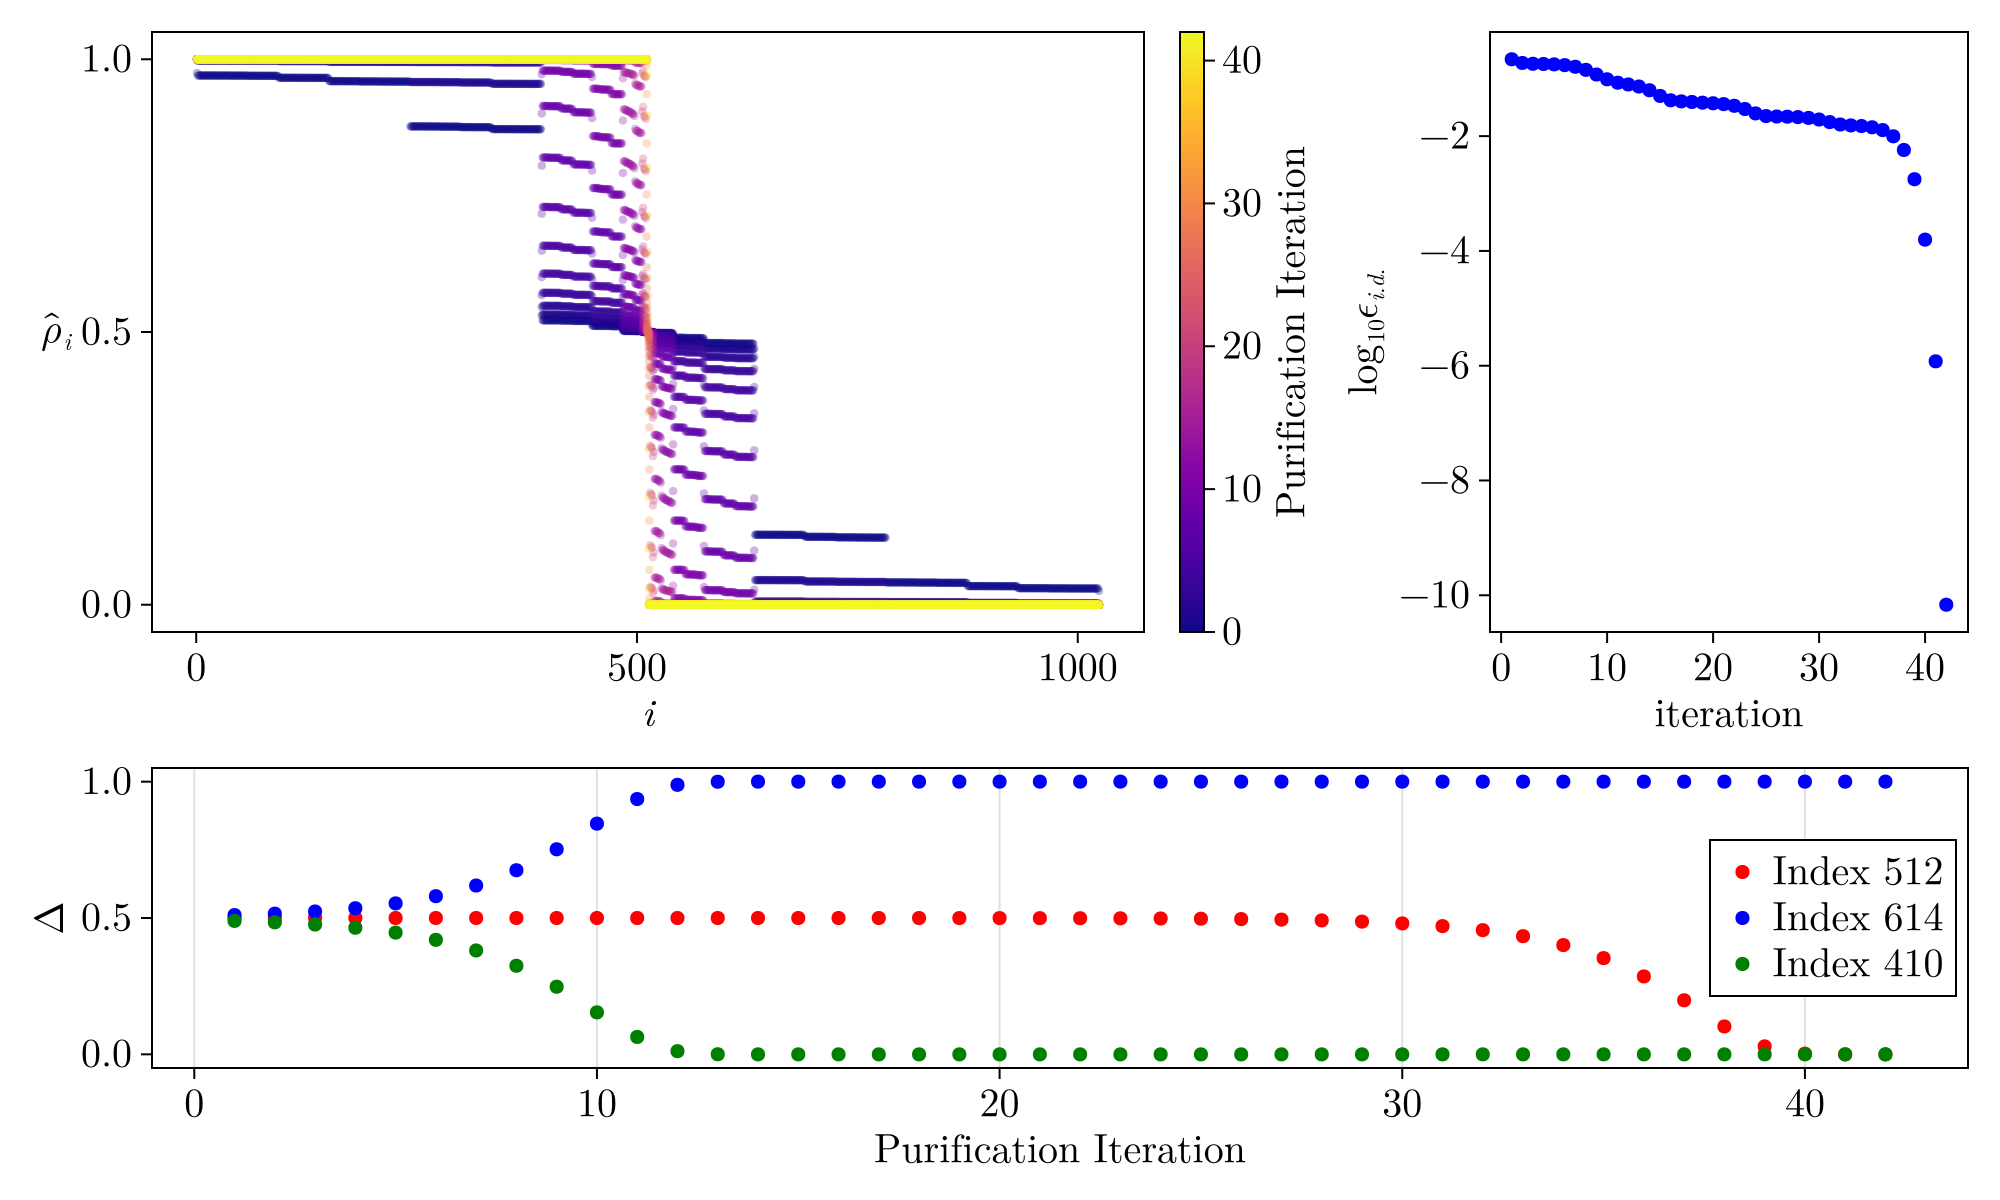

CairoMakie.Screen{PDF}


In [58]:
with_theme(theme_latexfonts()) do

fig = Figure(size= (1000, 600),fontsize=20)
ax1 = Axis(fig[1,1:2],xgridvisible=false, ygridvisible=false, xlabel=L"i",ylabel = L"\hat{\rho}_i",ylabelrotation=0)

cmap = cgrad(:plasma, length(log_eigenvalues), categorical = true)

for i in eachindex(log_eigenvalues)
     scatter!(ax1, reverse(log_eigenvalues[i]), color = cmap[i], markersize= 6, alpha=0.3)
end    
Colorbar(fig[1, 3], limits=(0, length(log_eigenvalues)), colormap=:plasma, label="Purification Iteration")

# hlines!(ax1, [0.5], color=:black, linestyle=:dash, linewidth=2)



ax2 = Axis(fig[1,4],xgridvisible=false, ygridvisible=false, xlabel="iteration",ylabel=L"\log_{10}\epsilon_{i.d.}")
scatter!(ax2, log10.(idem_errors[1:end]), color=:blue, markersize=10)
# vlines!(ax2, [16], color=:black, linestyle=:dash, linewidth=3)
# display(fig)

near_half_up = []
near_02_up = []
near_08_up = []

println(Ne)

for i in eachindex(log_eigenvalues)
    evs = log_eigenvalues[i]




    push!(near_half_up, evs[Ne])


    push!(near_02_up, evs[Ne + 40])

     push!(near_08_up, evs[Ne - 40])

end

with_theme(theme_latexfonts()) do

ax3 = Axis(fig[2,1:4], ylabel=L"\Delta", ygridvisible=false,xlabel="Purification Iteration")
scatter!(ax3, near_half_up, color=:red, markersize=10,label="Index $(Ne)")
scatter!(ax3, near_02_up, color=:blue, markersize=10,label="Index $(Ne + div(N, 10))")
scatter!(ax3, near_08_up, color=:green, markersize=10,label="Index $(Ne - div(N, 10))")

axislegend(ax3; position = :rc)
# save("../../Figures/Purification_Eigenvalues_Convergence.pdf", fig)
rowsize!(fig.layout, 1, Auto(2.0)) 
rowsize!(fig.layout, 2, Auto(1.0))


# xlims!(ax1, 850,920)

display(fig)

end

save("../../Figures/Purification_Eigenvalues_and_IdemError_FB.pdf", fig)
end

In [59]:
es, vecs = eigen(H)

occupations = real.(diag(vecs' * ρ * vecs))
ρ_ED = vecs[:,1:Ne] * Diagonal(ones(Ne)) * vecs[:,1:Ne]'

1024×1024 Matrix{Float64}:
  0.5           0.45584      -1.03215e-15  …   1.58765e-15   0.200456
  0.45584       0.5          -0.168119         0.0197244     1.27922e-14
 -1.03215e-15  -0.168119      0.5             -7.55051e-15   0.306761
  0.0200433    -1.65549e-15   0.244286         0.00335697    3.42758e-15
 -8.24678e-17   0.0639065     2.78926e-15      3.31297e-15  -0.153938
  0.00931528   -1.96313e-15   0.0715618    …   0.0055174     7.1792e-15
  6.84339e-16   0.0208094     1.36041e-15      1.26267e-15  -0.052752
 -0.03364       1.34497e-14  -0.232303        -0.0294899    -3.9608e-14
 -4.81083e-15  -0.00821222   -1.20646e-14     -1.26407e-14   0.0241491
  0.000873908  -3.33596e-15   0.00601804       0.000778683   9.07177e-16
 -4.95396e-15  -0.0275775    -4.67856e-14  …  -1.70532e-14   0.0811971
  0.000249347   2.41004e-15   0.00170722       0.00024466    5.59235e-16
  1.05915e-14   0.0318362     5.24217e-14      3.05918e-14  -0.0937481
  ⋮                                        ⋱

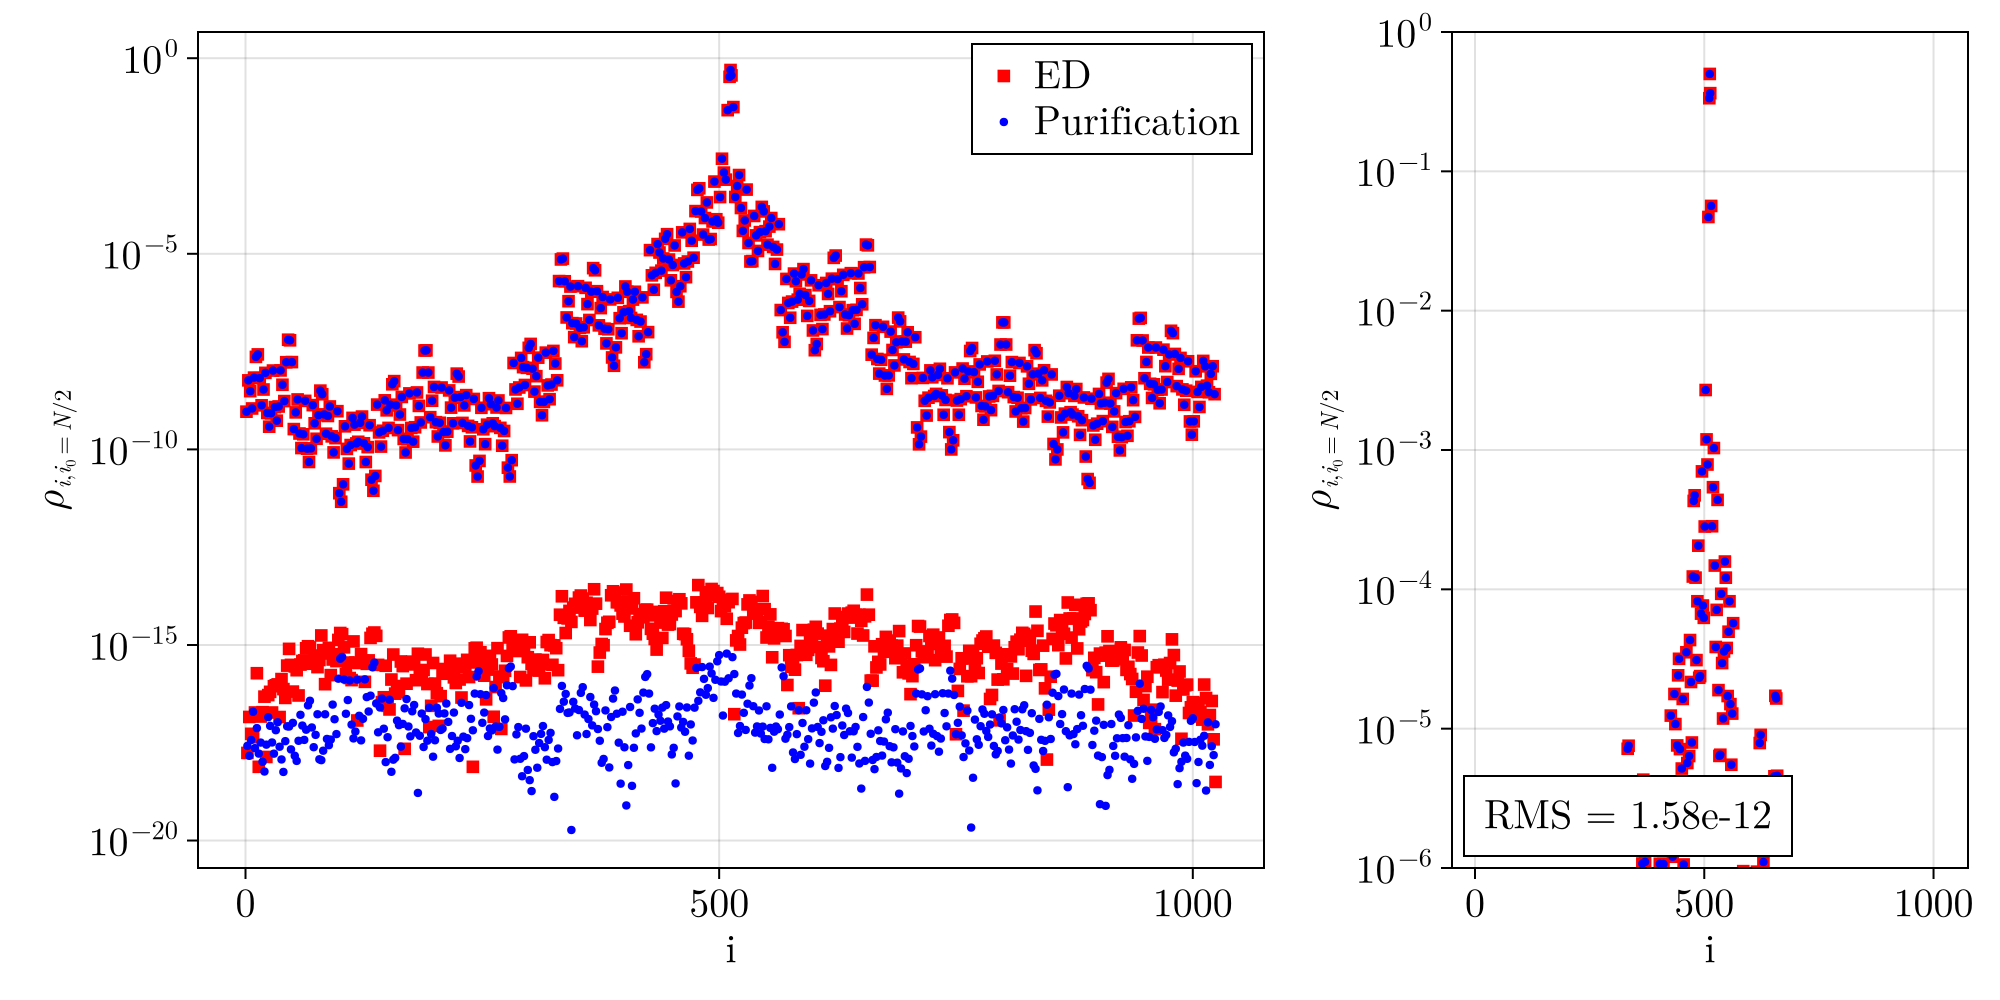

CairoMakie.Screen{IMAGE}


In [60]:
center = div(N,2)


line_ρ = real.(ρ[center, :])
with_theme(theme_latexfonts()) do
fig = Figure(size= (1000, 500),fontsize=20)
ax1 = Axis(fig[1,1:2],xlabel="i", ylabel=L"\rho_{i,i_0=N/2}",yscale=log10)
scatter!(ax1, 1:N, abs.(ρ_ED[center, :]), color=:red, markersize=10,marker=:rect,label="ED")
scatter!(ax1, 1:N, abs.(line_ρ), color=:blue, markersize=6,label="Purification")
axislegend(ax1, position = :rt) 

ax2 = Axis(fig[1,3],xlabel="i", ylabel=L"\rho_{i,i_0=N/2}",yscale=log10, limits=(nothing, nothing, 1e-6, 1.0))
scatter!(ax2, 1:N, abs.(ρ_ED[center, :]), color=:red, markersize=10,marker=:rect,label="ED")
scatter!(ax2, 1:N, abs.(line_ρ), color=:blue, markersize=6,label="Purification")
rmsd = sqrt(mean((ρ_ED - ρ).^2))

axislegend(ax2, [PolyElement(color=:transparent)], ["RMS = $(@sprintf("%.2e", rmsd) )"],
    position = :lb,       # :rt = right top (canto superior direito)
    framevisible = true,  # Mostra a borda
    backgroundcolor = :white,     # Fundo branco
    padding = (-15, 10, 10, 10) # Margem interna
)
display(fig)

# save("../../Figures/Purification_vs_ED_tbChainN=1024.pdf", fig)
end

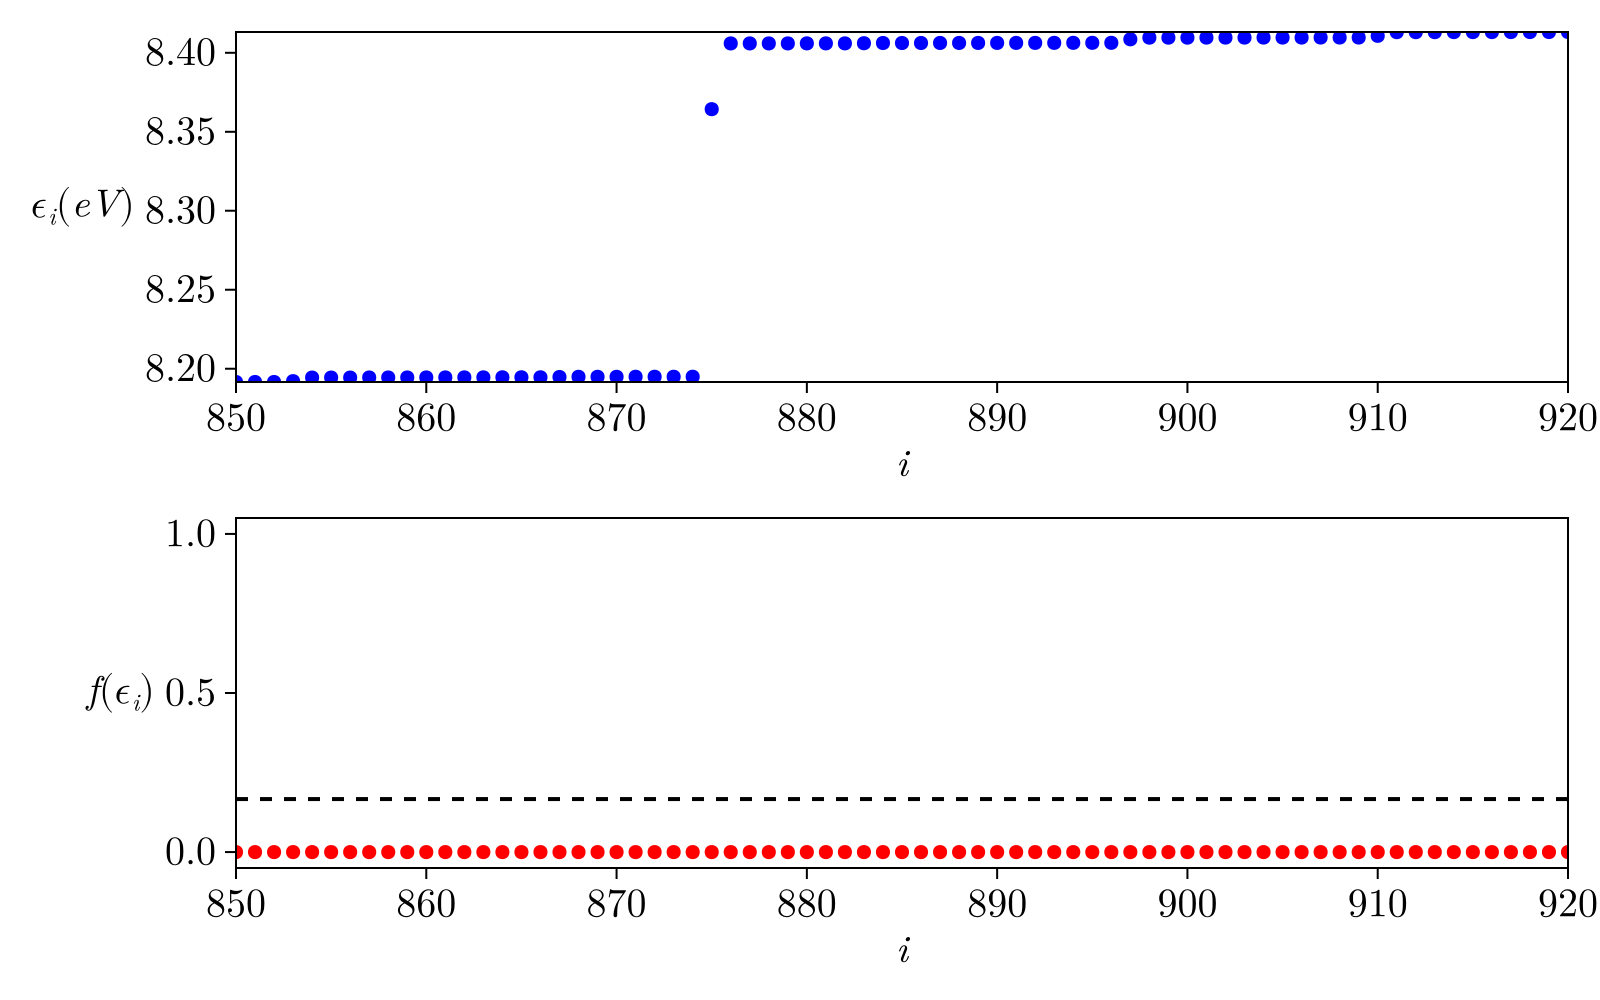

CairoMakie.Screen{PDF}


In [61]:

with_theme(theme_latexfonts()) do
fig = Figure(size= (800, 500),fontsize=20)
ax = Axis(fig[1,1],xgridvisible=false, ygridvisible=false, xlabel=L"i ",ylabel = L"\epsilon_i (eV)",ylabelrotation=0)
scatter!(ax, es.*2.7, color=:blue, markersize=10, label="Purification")


ylims!(ax, es[850]*2.7,es[920]*2.7)
vlines!(ax, Ne, color=:black, linestyle=:dash, linewidth=2, label="Fermi Level ED")
xlims!(ax, 850,920)

ax2 = Axis(fig[2,1],xgridvisible=false, ygridvisible=false, xlabel=L"i ",ylabel = L"f(\epsilon_i)",ylabelrotation=0)
scatter!(ax2, occupations, color=:red, markersize=10, label="Diagonalization")
xlims!(ax2, 850,920)

hlines!(ax2, [1/6], color=:black, linestyle=:dash, linewidth=2)
display(fig)

save("../../Figures/Purification_Eigenvalues_and_Occupations_FB.pdf", fig)
end  